## What speed?

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

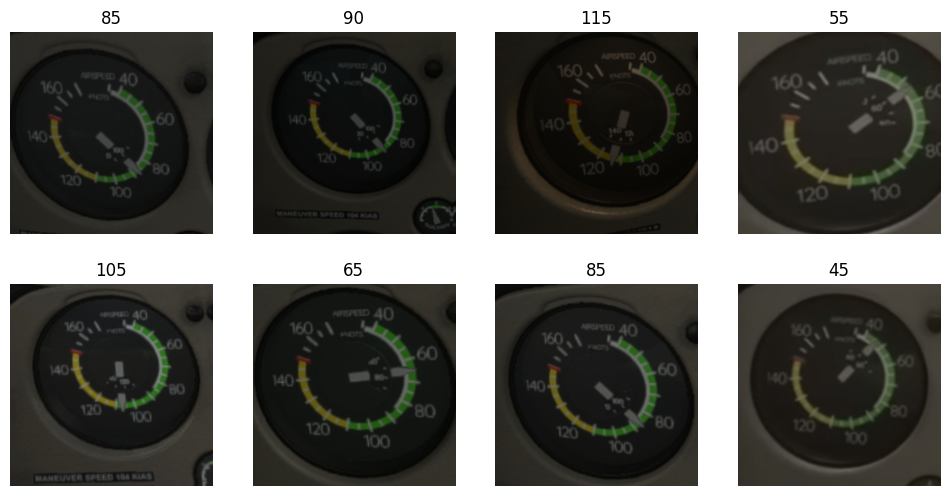

In [3]:
from fastcore.all import *
from fastai.vision.all import *
path = Path('speed_dataset')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(240, method='crop')],
    batch_tfms=aug_transforms(mult=0.5, do_flip=False)
).dataloaders(path, bs=32)

dls.show_batch(max_n=8)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "bird" or "forest").

    get_items=get_image_files, 

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [4]:
learn = vision_learner(dls, resnet18, metrics=error_rate).to_fp16()
learn.fine_tune(100)

epoch,train_loss,valid_loss,error_rate,time
0,4.664546,5.886150,1.000000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,4.025885,4.683423,1.000000,00:01
1,3.844940,4.197800,1.000000,00:01
2,3.940291,3.904803,1.000000,00:01
3,3.811244,3.640152,1.000000,00:01
4,3.693055,3.498411,0.964286,00:01
5,3.555266,3.301924,0.857143,00:01
6,3.410672,3.104731,0.821429,00:01
7,3.273506,2.971945,0.821429,00:01
8,3.152836,2.900748,0.785714,00:01
9,3.022439,2.827524,0.714286,00:01


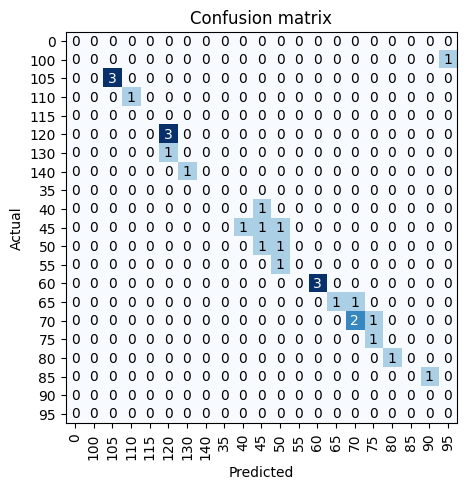

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

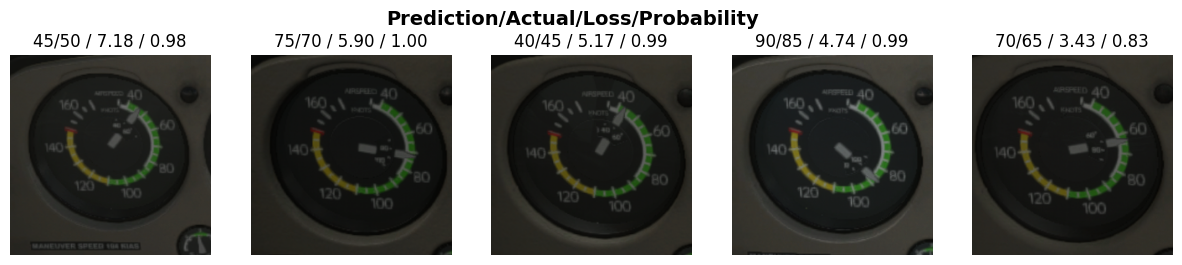

In [6]:
interp.plot_top_losses(5, nrows=1)

In [10]:
learn.export()